<h3><b>Introduction</b></h3>
<p> The goal of this project is to take the publically available Beijing weather data from 2013 to 2017 and apply Time Series techniques to see if we can predict the amount of PM2.5 concentration in the air given other environmental features.I hope to come up with a predictive model with a high accuracy and a very low Root Mean Square Error (RMSE).</p>
<br>
<h5><b>Dataset Information</b></h5>
<p>This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.</p>
<br>
<h5><b>Project workflow</b></h5>
<p>This project utilizes the Time Series model. The model we hope to succeed in training is a regression model and below are the steps we will go through in this colab notebook for this project:</p>
<ul>
    <li>Import the neccessary libraries and loading the data</li>
    <li>Data preprocessing</li>
    <li>Exploratory Data Ananlysis</li>
    <li>Seasonality Checking</li>
    <li>Model Fitting using ARIMA</li>
    <li>Saving the model</li>
</ul>
<br>


# Importing Libraries

In [ ]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import glob
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

# Accesing the DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading all the datasets
df1 = pd.read_csv("/content/drive/MyDrive/dataset.csv")

# Viewing of Dataset

In [ ]:
# Viewing of Dataset
df1.head(3)
#observing the top 3 rows of the data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


In [ ]:
df2.head(3)

In [ ]:
df3.head(3)

In [ ]:
df4.head(3)

In [ ]:
df5.head(3)

In [ ]:
df6.head(3)

In [ ]:
df7.head(3)

In [ ]:
df8.head(3)

In [ ]:
df9.head(3)

In [ ]:
df10.head(3)

In [ ]:
df11.head(3)

In [ ]:
df12.head(3)

In [ ]:
df1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
df1.shape

(35064, 18)

# Merging the Dataset

In [ ]:
#df_merged = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])


## Viewing Merged Data

In [ ]:
df_merged = df1 #delete it and add you previous code as it is
df_merged.head(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


In [ ]:
df_merged.info

<bound method DataFrame.info of           No  year  month  day  hour  ...  DEWP  RAIN   wd  WSPM       station
0          1  2013      3    1     0  ... -18.8   0.0  NNW   4.4  Aotizhongxin
1          2  2013      3    1     1  ... -18.2   0.0    N   4.7  Aotizhongxin
2          3  2013      3    1     2  ... -18.2   0.0  NNW   5.6  Aotizhongxin
3          4  2013      3    1     3  ... -19.4   0.0   NW   3.1  Aotizhongxin
4          5  2013      3    1     4  ... -19.5   0.0    N   2.0  Aotizhongxin
...      ...   ...    ...  ...   ...  ...   ...   ...  ...   ...           ...
35059  35060  2017      2   28    19  ... -16.2   0.0   NW   2.4  Aotizhongxin
35060  35061  2017      2   28    20  ... -15.1   0.0  WNW   0.9  Aotizhongxin
35061  35062  2017      2   28    21  ... -13.3   0.0   NW   1.1  Aotizhongxin
35062  35063  2017      2   28    22  ... -12.9   0.0  NNW   1.2  Aotizhongxin
35063  35064  2017      2   28    23  ... -15.9   0.0  NNE   1.3  Aotizhongxin

[35064 rows x 18 co

In [ ]:
df_merged.describe

<bound method NDFrame.describe of           No  year  month  day  hour  ...  DEWP  RAIN   wd  WSPM       station
0          1  2013      3    1     0  ... -18.8   0.0  NNW   4.4  Aotizhongxin
1          2  2013      3    1     1  ... -18.2   0.0    N   4.7  Aotizhongxin
2          3  2013      3    1     2  ... -18.2   0.0  NNW   5.6  Aotizhongxin
3          4  2013      3    1     3  ... -19.4   0.0   NW   3.1  Aotizhongxin
4          5  2013      3    1     4  ... -19.5   0.0    N   2.0  Aotizhongxin
...      ...   ...    ...  ...   ...  ...   ...   ...  ...   ...           ...
35059  35060  2017      2   28    19  ... -16.2   0.0   NW   2.4  Aotizhongxin
35060  35061  2017      2   28    20  ... -15.1   0.0  WNW   0.9  Aotizhongxin
35061  35062  2017      2   28    21  ... -13.3   0.0   NW   1.1  Aotizhongxin
35062  35063  2017      2   28    22  ... -12.9   0.0  NNW   1.2  Aotizhongxin
35063  35064  2017      2   28    23  ... -15.9   0.0  NNE   1.3  Aotizhongxin

[35064 rows x 18 

In [ ]:
df_merged.shape

(35064, 18)

In [ ]:
df_merged.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [ ]:
# checking datatypes of the merged dataframe
df_merged.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [ ]:
# checking datatypes of the merged dataframe
df_merged.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [ ]:
# view columns
df_merged.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

# Data Preprocessing

In [ ]:
# drop the unwanted columns/features
cols_to_drop = ['No','station']
data = df_merged.drop(cols_to_drop,axis=1)
# print out the info of the data


In [ ]:
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   PM2.5   34139 non-null  float64
 5   PM10    34346 non-null  float64
 6   SO2     34129 non-null  float64
 7   NO2     34041 non-null  float64
 8   CO      33288 non-null  float64
 9   O3      33345 non-null  float64
 10  TEMP    35044 non-null  float64
 11  PRES    35044 non-null  float64
 12  DEWP    35044 non-null  float64
 13  RAIN    35044 non-null  float64
 14  wd      34983 non-null  object 
 15  WSPM    35050 non-null  float64
dtypes: float64(11), int64(4), object(1)
memory usage: 4.3+ MB


In [ ]:
data.describe

<bound method NDFrame.describe of        year  month  day  hour  PM2.5  PM10  ...  TEMP    PRES  DEWP  RAIN   wd  WSPM
0      2013      3    1     0    4.0   4.0  ...  -0.7  1023.0 -18.8   0.0  NNW   4.4
1      2013      3    1     1    8.0   8.0  ...  -1.1  1023.2 -18.2   0.0    N   4.7
2      2013      3    1     2    7.0   7.0  ...  -1.1  1023.5 -18.2   0.0  NNW   5.6
3      2013      3    1     3    6.0   6.0  ...  -1.4  1024.5 -19.4   0.0   NW   3.1
4      2013      3    1     4    3.0   3.0  ...  -2.0  1025.2 -19.5   0.0    N   2.0
...     ...    ...  ...   ...    ...   ...  ...   ...     ...   ...   ...  ...   ...
35059  2017      2   28    19   12.0  29.0  ...  12.5  1013.5 -16.2   0.0   NW   2.4
35060  2017      2   28    20   13.0  37.0  ...  11.6  1013.6 -15.1   0.0  WNW   0.9
35061  2017      2   28    21   16.0  37.0  ...  10.8  1014.2 -13.3   0.0   NW   1.1
35062  2017      2   28    22   21.0  44.0  ...  10.5  1014.4 -12.9   0.0  NNW   1.2
35063  2017      2   28    23  

In [ ]:
# check for duplicated values and null values
print('Is there duplicate values in the data ? : {}\n'.format(data.duplicated().any()))
print('The total number of Null values in each colum:')
display(data.isnull().sum())

Is there duplicate values in the data ? : False

The total number of Null values in each colum:


year        0
month       0
day         0
hour        0
PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
dtype: int64

In [ ]:
# find the most appearing wind direction value
data.wd.mode()

0    NE
dtype: object

In [ ]:
# fill in the missing values with the mean of the particular column
data.fillna(value=data.mean(),inplace=True)
# replace the missing values for the wind direction with the modal value
data.wd.fillna(value='NE',inplace=True)
# let's check the data again if there are any missing values
data.isnull().any()

year     False
month    False
day      False
hour     False
PM2.5    False
PM10     False
SO2      False
NO2      False
CO       False
O3       False
TEMP     False
PRES     False
DEWP     False
RAIN     False
wd       False
WSPM     False
dtype: bool

In [ ]:
data.head()

In [ ]:
data.shape

(35064, 16)

In [ ]:
data.dtypes

year       int64
month      int64
day        int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
PRES     float64
DEWP     float64
RAIN     float64
wd        object
WSPM     float64
dtype: object

In [ ]:
data.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [ ]:
data.shape

(35064, 16)

In [ ]:
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [ ]:
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [ ]:
data1=pd.to_datetime(data[['year','month','day','hour']])

In [ ]:
data1.shape

(35064,)

In [ ]:
data.shape

(35064, 16)

In [ ]:
data1.head(3)

0   2013-03-01 00:00:00
1   2013-03-01 01:00:00
2   2013-03-01 02:00:00
dtype: datetime64[ns]

In [ ]:
data_frame=pd.concat([data1,data],axis=1)

In [ ]:
data_frame.shape

(35064, 17)

In [ ]:
data_frame.columns

Index([      0,  'year', 'month',   'day',  'hour', 'PM2.5',  'PM10',   'SO2',
         'NO2',    'CO',    'O3',  'TEMP',  'PRES',  'DEWP',  'RAIN',    'wd',
        'WSPM'],
      dtype='object')

In [ ]:
data_frame.head()

,0,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [ ]:
#drop the unwanted columns/features

#cols_to_drop = ['year','month','day','hour']



In [ ]:
# data_frame = data_frame.drop(cols_to_drop,axis=1)
# print out the info of the data

In [ ]:
data_frame.head()

,0,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [ ]:
data_frame.rename(columns={0: 'Date'},inplace=True)

In [ ]:
data_frame.shape

(35064, 17)

In [ ]:
data_frame.head()

,Date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [ ]:
data_frame.dtypes

Date     datetime64[ns]
year              int64
month             int64
day               int64
hour              int64
PM2.5           float64
PM10            float64
SO2             float64
NO2             float64
CO              float64
O3              float64
TEMP            float64
PRES            float64
DEWP            float64
RAIN            float64
wd               object
WSPM            float64
dtype: object

In [ ]:
data_frame.columns

Index(['Date', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'],
      dtype='object')

<h3><b>Exploratory Data Analysis</b></h3>
<p>Before we start fitting a machine learning model on the data, we need to know much about the data by performing an Exploratory Data Analysis to gain insight from it. <abbr title="Exploratory Data Analysis">EDA</abbr> is simply describing the data by means of visualization. It involves asking questions about the data and answering them with the help of charts/graphs (graphical representation of the data). In this process, we will try to study the behavoir of the amount of pollutant (PM2.5 concentration) in the air and the relationship between other features. Below are some of the questions we will try to answer by analyzing the data, to know more about our dependent and independent variables:</p>
<ul>
    <li>what pattern does the amount of PM2.5 concentration in the air recorded in an hour follow
        for a daily time period ?</li>
    <li>In which month does the amount of PM2.5 contained in the air rises ?</li>
    <li>At what time of the day do we expect the amount of PM2.5 concentration in the
        air to be high ?</li>
    <li>In which direction does polluted air/wind mostly move ?</li>
    <li>How do the other environmental factors affect the amount of PM2.5 concentration
        in the air ?</li>
</ul>
<p>We now have our questions so let's just dive into our data and start finding and interpreting some results. But since we are going to take averages of the dependent variable, we shoul know the distribtution of the data before we do take averages.</p>

In [ ]:
data_frame.shape

(35064, 17)

In [ ]:
data_frame.columns

Index(['Date', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [ ]:
data_frame.info

<bound method DataFrame.info of                      Date  year  month  day  ...  DEWP  RAIN   wd  WSPM
0     2013-03-01 00:00:00  2013      3    1  ... -18.8   0.0  NNW   4.4
1     2013-03-01 01:00:00  2013      3    1  ... -18.2   0.0    N   4.7
2     2013-03-01 02:00:00  2013      3    1  ... -18.2   0.0  NNW   5.6
3     2013-03-01 03:00:00  2013      3    1  ... -19.4   0.0   NW   3.1
4     2013-03-01 04:00:00  2013      3    1  ... -19.5   0.0    N   2.0
...                   ...   ...    ...  ...  ...   ...   ...  ...   ...
35059 2017-02-28 19:00:00  2017      2   28  ... -16.2   0.0   NW   2.4
35060 2017-02-28 20:00:00  2017      2   28  ... -15.1   0.0  WNW   0.9
35061 2017-02-28 21:00:00  2017      2   28  ... -13.3   0.0   NW   1.1
35062 2017-02-28 22:00:00  2017      2   28  ... -12.9   0.0  NNW   1.2
35063 2017-02-28 23:00:00  2017      2   28  ... -15.9   0.0  NNE   1.3

[35064 rows x 17 columns]>

In [ ]:
data_frame.PM10.describe()

count    35064.000000
mean       110.060391
std         94.243001
min          2.000000
25%         39.000000
50%         89.000000
75%        153.000000
max        984.000000
Name: PM10, dtype: float64

In [ ]:
data_frame[['PM2.5']].describe()

,PM2.5
count,35064.000000
mean,82.773611
std,81.045038
min,3.000000
25%,23.000000
50%,61.000000
75%,112.000000
max,898.000000


In [ ]:
data_frame.columns

Index(['Date', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [ ]:
data_frame.isna().sum()

Date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
data_frame.set_index(data_frame['Date']).drop('Date', 1)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
Date,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1


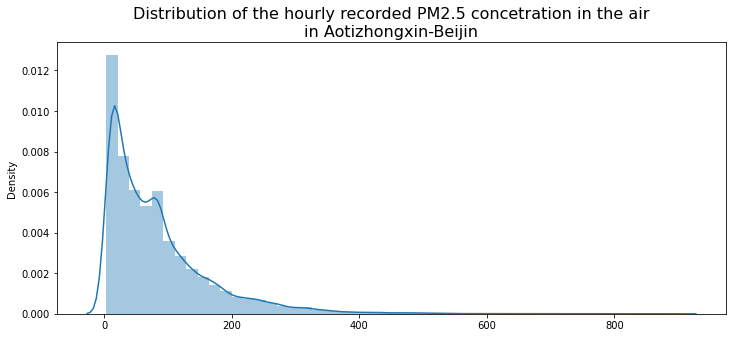

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(data_frame[['PM2.5']],bins=50)
plt.title('Distribution of the hourly recorded PM2.5 concetration in the air\nin Aotizhongxin-Beijin',
          fontsize=16)
plt.show()

<h5><b>what pattern does the amount of PM2.5 concentration in the air recorded in an hour follow
        for a daily time period ?</b></h5>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

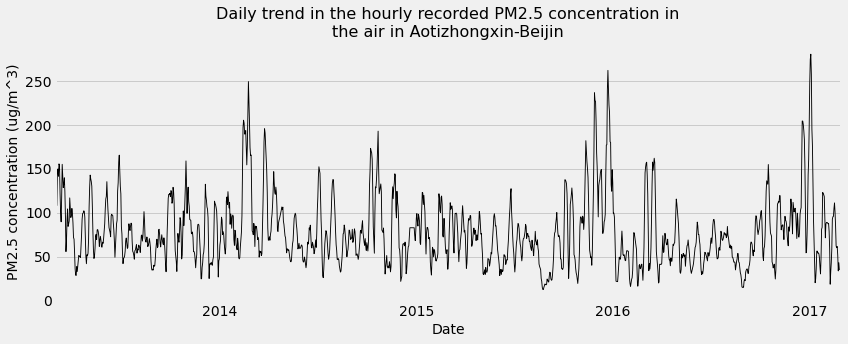

In [ ]:
# find the daily average of PM2.5 contained in the air in any given hour
daily_data = data_frame[['Date','PM2.5']]
daily_data = daily_data.set_index('Date')
daily_data = daily_data.resample('D').median()
decomposition = seasonal_decompose(daily_data,model='addictive')

# plot the data
with plt.style.context('fivethirtyeight'):
    decomposition.trend.plot(figsize=(12,5),style='k-',linewidth=.9,legend=False)
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Daily trend in the hourly recorded PM2.5 concentration in\nthe air in Aotizhongxin-Beijin',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

<h5><b>In which month does the amount of PM2.5 contained in the air rises ?</b></h5>

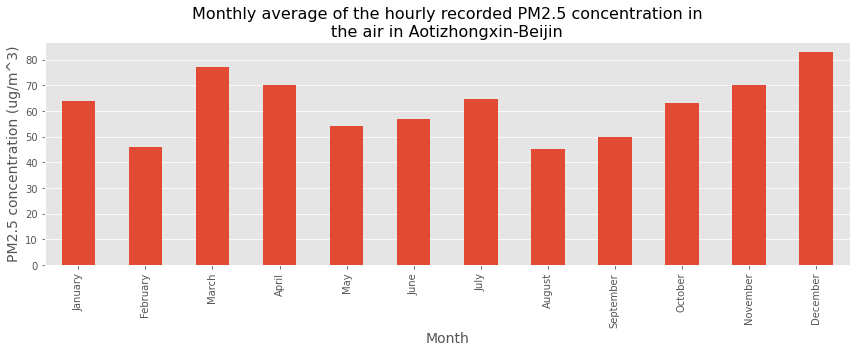

In [ ]:
monthly_data = data_frame[['month','PM2.5']]
months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']
ordered_monthdf = pd.DataFrame(months,columns=['month'])
map_dict = {}
for i,j in enumerate(months):
    map_dict.setdefault(i+1,j)

monthly_data.month = monthly_data.month.map(map_dict)
monthly_average = monthly_data.groupby('month').median()
monthly_average = pd.merge(ordered_monthdf,monthly_average,left_on='month',right_index=True)
monthly_average = np.round(monthly_average,1)
monthly_average = monthly_average.set_index('month')

# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM2.5 concentration in\nthe air in Aotizhongxin-Beijin',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

<h5><b>At what time of the day do we expect the amount of PM2.5 concentration in the air to be high ?</b></h5>

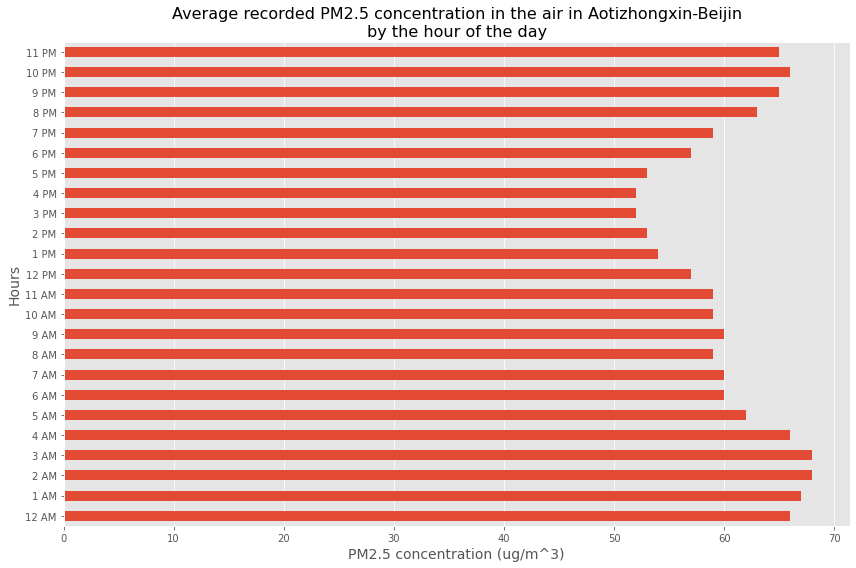

In [ ]:
hourly_data = data_frame[['hour','PM2.5']]
hrs = ['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM',
      '11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM',
      '8 PM','9 PM','10 PM','11 PM']
hour_dict = {}
for i,j in enumerate(hrs):
    hour_dict.setdefault(i,j)
    
hourly_data = hourly_data.groupby('hour').median().reset_index()
hourly_data.hour = hourly_data.hour.map(hour_dict)
hourly_data = hourly_data.set_index('hour')

# plot the data
with plt.style.context('ggplot'):
    hourly_data.plot(figsize=(12,8),legend=False,kind='barh',linewidth=.9)
    plt.ylabel('Hours',fontsize=14)
    plt.xlabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Average recorded PM2.5 concentration in the air in Aotizhongxin-Beijin\nby the hour of the day',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

<h5><b>In which direction does polluted air/wind mostly move ?</b></h5>

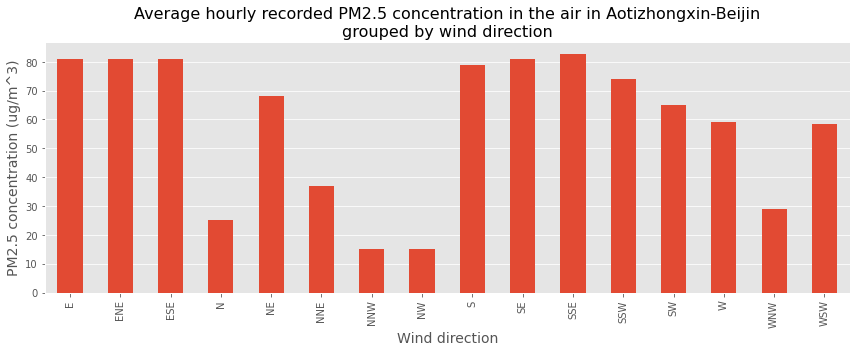

In [ ]:
wind_dir = data_frame[['wd','PM2.5']]
wind_dir = wind_dir.groupby('wd').median()

# plot the data
with plt.style.context('ggplot'):
    wind_dir.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Wind direction',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Average hourly recorded PM2.5 concentration in the air in Aotizhongxin-Beijin\ngrouped by wind direction',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

<h5><b>How do the other environmental factors affect the amount of PM2.5 concentration in the air ?</b></h5>

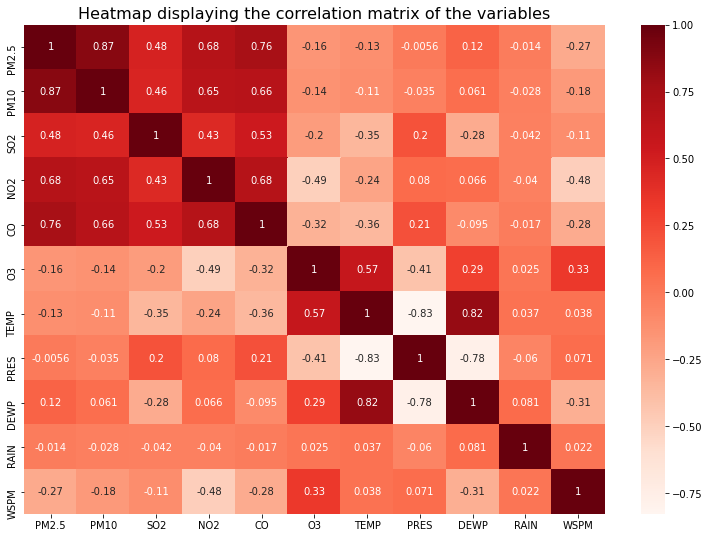

In [ ]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data_frame[['PM2.5', 'PM10', 'SO2', 'NO2',
                         'CO', 'O3', 'TEMP', 'PRES',
                         'DEWP', 'RAIN', 'WSPM']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

# Testing

In [ ]:
data_frame.head()

,Date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [ ]:
data_frame.shape

(35064, 17)

In [ ]:
data_frame[['PM10']]

,PM10
0,4.0
1,8.0
2,7.0
3,6.0
4,3.0
...,...
35059,29.0
35060,37.0
35061,37.0
35062,44.0


In [ ]:
data_frame[['PM2.5']]

,PM2.5
0,4.0
1,8.0
2,7.0
3,6.0
4,3.0
...,...
35059,12.0
35060,13.0
35061,16.0
35062,21.0


In [ ]:
data_frame[:5]

,Date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [ ]:
new_df = data_frame

In [ ]:
new_df = new_df.set_index('Date',drop=True, append=False, inplace=False, verify_integrity=False)

In [ ]:
new_df[:5]

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
Date,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [ ]:
# convert frequency to weeks
df_wk =  new_df['PM10'].resample('W').mean() #change da column to whatever you need to resample
print('week frequency shape:', df_wk.shape) 
print('PM10 missing values:', df_wk.isna().sum()) #since we are already resampling the data with pm10 column there is no need to mention the column nmae here same apply for every other column

week frequency shape: (210,)
PM10 missing values: 0


# Trends and repeating variations.

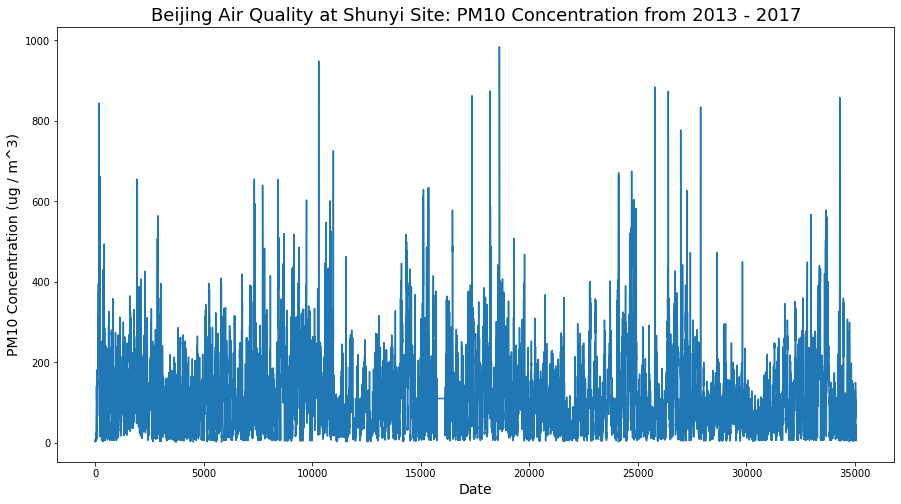

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(data_frame.PM10)
plt.title('Beijing Air Quality at Shunyi Site: PM10 Concentration from 2013 - 2017', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration (ug / m^3)', fontsize=14);

# Observations:

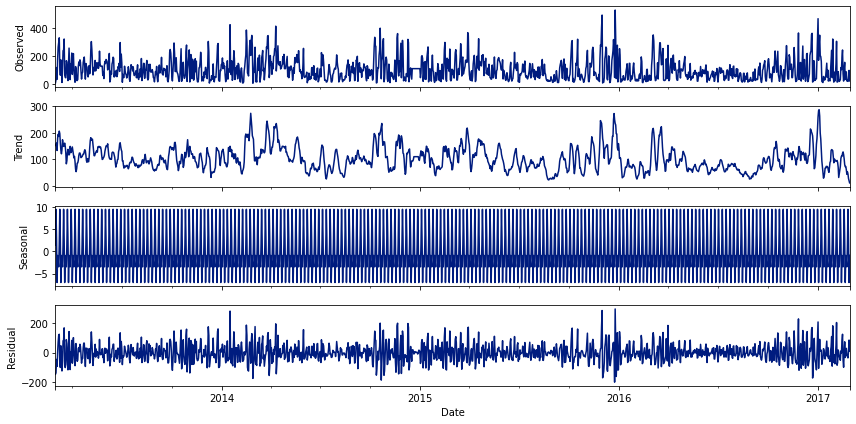

In [ ]:
# time series decomposition
import statsmodels.api as sm
plt.style.use('seaborn-dark-palette')
plt.rcParams['figure.figsize'] = (12, 6)
data1 = data_frame[['Date','PM10']]
data1 = data1.set_index('Date')
data1 = data1.resample('D').median()
decomposition = seasonal_decompose(data1,model='addictive', extrapolate_trend='freq')

fig = decomposition.plot()


# Series stationarity.

In [ ]:
# augmented dickey-fuller test
from statsmodels.tsa.stattools import adfuller

df_aft = adfuller(data_frame.PM10, autolag='AIC')
output = pd.Series(df_aft[0:4], index=['test statistic', 'pvalue', 'number of lags used', 'number of observations'])
output

test statistic              -18.918147
pvalue                        0.000000
number of lags used          51.000000
number of observations    35012.000000
dtype: float64

In [ ]:
# augmented dickey-fuller test
from statsmodels.tsa.stattools import adfuller

df_aft = adfuller(data_frame[['PM2.5']], autolag='AIC')
output = pd.Series(df_aft[0:4], index=['test statistic', 'pvalue', 'number of lags used', 'number of observations'])
output

test statistic              -19.210436
pvalue                        0.000000
number of lags used          51.000000
number of observations    35012.000000
dtype: float64

# Training and testing sets

In [ ]:
# train-test split
pct_train = 0.80
split_wk_idx = round(len(data_frame) * pct_train)
train_wk, test_wk = data_frame[:split_wk_idx], data_frame[split_wk_idx:]

In [ ]:
test_wk[:5]


,Date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
28051,2016-05-12 19:00:00,2016,5,12,19,10.0,36.0,2.0,18.0,300.0,89.0,20.3,1011.7,-5.6,0.0,NNW,2.2
28052,2016-05-12 20:00:00,2016,5,12,20,26.0,52.0,2.0,30.0,400.0,66.0,17.4,1012.6,0.1,0.0,NNW,0.6
28053,2016-05-12 21:00:00,2016,5,12,21,11.0,77.0,2.0,47.0,500.0,34.0,14.7,1013.8,1.6,0.0,SW,0.5
28054,2016-05-12 22:00:00,2016,5,12,22,22.0,126.0,3.0,63.0,800.0,2.0,12.8,1014.4,2.6,0.0,NE,0.0
28055,2016-05-12 23:00:00,2016,5,12,23,31.0,118.0,3.0,60.0,800.0,2.0,11.2,1014.6,4.6,0.0,WNW,0.4


# Correlation coefficients.

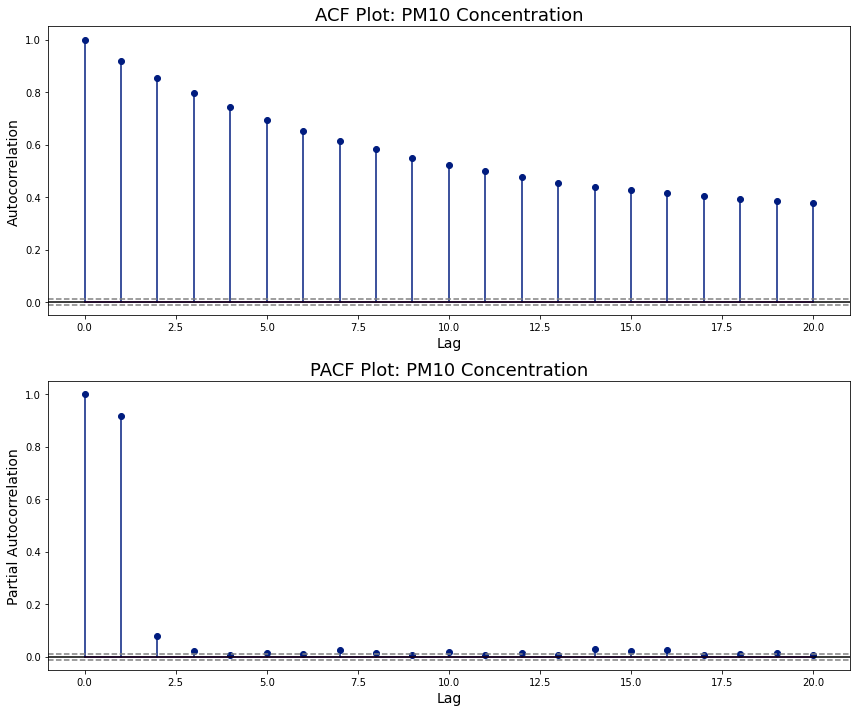

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

# ACF
lag_acf = acf(train_wk.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.title('ACF Plot: PM10 Concentration', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)

# PACF
lag_pacf = pacf(train_wk.PM10, nlags=20, method='ols')

plt.subplot(212)
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_wk)), linestyle='--', color='gray')
plt.title('PACF Plot: PM10 Concentration', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)

plt.tight_layout();

# ARIMA model

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 9.5MB/s 
     |████████████████████████████████| 9.5MB 34.4MB/s 
     |████████████████████████████████| 2.1MB 54.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [ ]:
# fit ARIMA model
import pmdarima as pm

fit_wk = pm.auto_arima(train_wk.PM10, start_p=0, d=1, start_q=0, max_p=6, max_d=6, max_q=6, 
                             start_P=0, D=1, start_Q=0, max_P=6, max_D=6, max_Q=6, seasonal=True, m=52, trace=True,
                             error_action='ignore', suppress_warnings=True, stepwise=True)  

fit_wk.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=304184.141, Time=103.77 sec


# Model Prediction

In [ ]:
# prediction plot
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_wk.index, train_wk.PM10, color='steelblue', marker='o')
plt.plot(train_wk.index, fit_wk.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test, ci_test = fit_wk.predict(n_periods=test_wk.shape[0], return_conf_int=True)
ci_lower = pd.Series(ci_test[:, 0], index=test_wk.index)
ci_upper = pd.Series(ci_test[:, 1], index=test_wk.index)
plt.scatter(test_wk.index, test_wk.PM10, color='darkred', marker='D')
plt.plot(test_wk.index, fit_wk.predict(n_periods=test_wk.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(ug / m^3)', fontsize=14)
plt.axvline(x=df_wk.PM10.index[split_wk_idx], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower.index, ci_lower, ci_upper, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

# Model Performance:

In [ ]:
# root mean square error 
from sklearn.metrics import mean_squared_error

print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_wk.PM10, fit_wk.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_wk.PM10, fit_wk.predict(n_periods=test_wk.shape[0]))))
